# Importing necessary libraries 

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [79]:
df = pd.read_csv('Consolidated_Dataframe.csv')

In [80]:
# Since reading from a csv, it will automatically have a Unnamed: 0 column. so dropping that
df.drop(columns=['Unnamed: 0', 'index'], inplace = True)

In [81]:
#want to be able to view all of the text, so increasing this to increase the character limit
# pd.options.display.max_colwidth = 5000

In [82]:
df.tail()

Cool  Funny  Rating  \
27596     5      6     2.0   
27597    14     13     2.0   
27598    10      9     3.0   
27599    12      8     3.0   
27600     5     11     1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## Vader is a lexicon and rule-based sentiment analysis tool that is designed based off of sentiments expressed in social media. Most yelp reviews are written in a style similar to that of social media, so using this analyzer makes the most sense for this project

In [83]:
si = SentimentIntensityAnalyzer()

In [84]:
# Making a new column in my consolidated dataframe getting the compound score (avg of pos, neutral, neg)
df['Sentiment'] = df['Text'].map(lambda x: si.polarity_scores(x)['compound'])

In [85]:
# Breaking out the giant dataframe into 5 dataframes broken based on the yelp rating
df1 = df[df['Rating'] == 1]
df2 = df[df['Rating'] == 2]
df3 = df[df['Rating'] == 3]
df4 = df[df['Rating'] == 4]
df5 = df[df['Rating'] == 5]

In [86]:
# resetting the index for the new dataframes
df1.reset_index(inplace=True)
df1.drop(columns=['index'], inplace = True)

df2.reset_index(inplace=True)
df2.drop(columns=['index'], inplace = True)

df3.reset_index(inplace=True)
df3.drop(columns=['index'], inplace = True)

df4.reset_index(inplace=True)
df4.drop(columns=['index'], inplace = True)

df5.reset_index(inplace=True)
df5.drop(columns=['index'], inplace = True)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [117]:
df1.tail()

,Cool,Funny,Rating,Text,Useful,Sentiment
4788,10,15,1.0,"BEDBUGS!!!!!!!!!!!!!!!!!!!\nDo you like bloodsucking parasites? No? Then AVOID ALL THINGS TRUMP. The worst thing is, you'll bring em home with you--YOU CAN'T ESCAPE THEM.It wasn't my choice to stay in a Trump hotel, but a few stupid people made the decision for me against my wishes. Now we're all paying for it! What a nasty place.",39,-0.9435
4789,8,16,1.0,"Oh heavens! You're sporting a ""Got Vokda?"" slogan. You market yourself as a Polish restaurant, yes, but before that a craft cocktail bar specializing in vodka. \n\nYou use Sobieski in the majority of your cocktails. What the actual heck? Nothing small-batch. Not even something a little upscale. You use vodka that would only even pass as mid-shelf at a freaking Wal-Mart, but charge the same prices as places like Blue Hound or the rest of this city's premier watering holes.\n\nMy ""Napolean Complex"" tasted like rubbing alcohol. The alleged absinthe was not noticeable. It was icky all the way down. The ""Cactus Milk"" I tried tasted like someone panicked about not being able to fill the glass with ingredients that mattered, and topped it off with way too much soda water. It was diluted. If you're gonna take forever to get these drinks to us, make them with care! Or at least, better ingredients.\n\nOn the way out, we learned they don't take AMEX. Yes, in the 2010s. In a neighborhood in which we can be chauffeured about using smartphones, and bars are still unable to take certain cards. How gauche. \n\nSo yeah, this place is aesthetic. It looks and feels cooler than it actually is. The workers appear sharp. That's nice. I didn't try the pierogies, and perhaps I missed out. There are plenty of other Polish restaurants I can enjoy these in. As a bar, this messes up on a very fundamental level. If I'm going to splurge on my drinks, I'd be better served virtually anywhere else within a two-mile radius, so this will go in the books as a rare one-star review.",14,0.9796
4790,6,8,1.0,Pure scam no contract is bullshit and they do NOT want African Americans using their gym from what the treatment I've received as opposed to my Caucasian friends! I feel so belittled and beat up trying to cancel due to my situation I've been told i have no excuses as a single mother of three and that i have every excuse but they've made 7 months of payment from me without me even ENTERING their gym DO NOT GET SCAMMED. I'm reporting this treatment to the news,9,-0.7782
4791,13,12,1.0,"They made it onto a segment called ""Dirty Dining"" with our local channel 13 and reporter Darcy Spears! I knew it!\n11/7/18. Look it up on the internet. Health district claiming the most disgusting findings. I hope they clean this place up. \n\nThis is not a review I like to post, but I feel that the owners should be aware. \n\nProbably the most disgusting place I have ever eaten at. Only reason we went was because my 8yr old nephew likes their macaroni pizza. And that's where he wanted to go for his birthday. \n\nFilthy, unsanitary, gross and completely neglected.\nHow is a pizza place so gross? It should be shut down for dirty dining. \n\nSad to see that no one cares. It's that bad.",30,-0.9845
4792,5,11,1.0,I think this owner and the owner of Amy's Baking Company are soul mates. That is all...,13,0.0000


# The worst 1 star review

In [101]:
df1[df1.Sentiment == df1['Sentiment'].min()]

,Cool,Funny,Rating,Text,Useful,Sentiment
1868,21,23,1.0,"a sham & a farce - charlatans cashing in on the health food market! \n only the salads are worth eating - a gamble! the help are nice, but clueless, we took our food to go, couldn't wait to leave, it's a bogus health food joint, fake food! artificial sugars! garbage condiments - all chemicals! \n the fish is ""farm raised"" that's toxic, only eat wild!\nfarm raised feed is toxic that they give farm raised fish, all over, farm raised is bad! it's bs bad quality fish & harmful to you!\n stay away from farm raised fish! it's cheap for businesses to buy, and they charge you the same high price as the good wild fish.\n the condiments are all artificial chemicals, loaded w/sugar, fake food chemical dye food colorings, preservatives that equates to ""toxic cancer""! \nthey have smuckers, heinz mustard & heinz ketchup, all artificial crap. what a joke! this is ludicrous & unhealthy crap!\n also they cook and have sriracha on the counter with smuckers and heinz in the condiment box tray to use. all toxic! \npeople living near the sriracha plant in ca. all got seriously sick just from breathing the fumes emanating from the plant. it's toxic poison! stay away! this place is capitalizing on the health food market with fake, nasty, sickly food & preparations! help wipes tables down, deals with credit cards, money and your food, never washing hands!\n\n all ingredients with artificial, preservatives and chemical food colorings in your food and drink, act as acid on your bones, slowly burning away your bones, causing arthritis, parkinson's, dementia, alzheimer's and many other diseases, sickness and ailments, its true!\n make healthy choices! this place is despicable and a disgrace. a menace and tarnishes the health food industry! \nthis place is a con job. fake & disgraceful! total scam!\n fake health food & sugar drinks! \ndummycrats must be pushing this place for the mindless automaton sheep to stay braindead, and dumb. only the simpletons eat here. you r what u eat!\n read ingredients, stop being meatheads! take charge, take control of your health, or, enjoy a life long series of doctor visits and illnesses, that's your life you can bet on it. or you can make healthy choices, for a healthy you! \n don't be a fool following the soft on intellect zombie robots & simple simons. this place is a sham selling lies & cashing in on your stupidity! a sellout with low grade food!\n wake up now, or later on the operating table! your choice.\n red wave coming! everyone""s waking up! MAGA\n\nTHEY CAN""T HANDLE THE TRUTH! FAKE w/VERY UNHEALTHY CRAP! CLUELESS ON HEALTH & NUTRITION! TOXIC JUNK!\nall automaton clueless sheep flock here! all garbage condiments, artificial. toxic fake garbage - total crap. poison! \nfake bs snake oil salesman selling lies! THEY USE ARTIFICIAL CRAP!\n fake food - charlatans selling crap! crappola=junk!\n not healthy - artificial toxic garbage - lies, a deceitful disgrace - a sham! unhealthy - a mockery! dishonest dive! MICRO WAVE USED!\nthis place is a joke! don't eat here, toxic garbage ingredients!\n \n ""NEVER PUT ANYTHING ARTIFICIAL IN YOUR BODY""!\nClueless Claud, Doctors & nurses study & push DRUGS & serve up micro waved junk fake food in hospitals. Clueless on nutrition, most obese & lethargic out of shape in poor health, DRUG PUSHING QUACKS! BLOODSUCKER$! WAKE UP! What a clown! NUKED FOOD HERE! NO NUTRITIONAL VALUE! FAKE & TOXIC!",31,-0.9995


# The best 5 star reviews

In [122]:
# To make the text more readable, can replace the number in the loc below to the index value
# print(df5.loc[1274, 'Text'])

In [109]:
df5[df5.Sentiment == df5['Sentiment'].max()]

Cool  Funny  Rating  \
515     34     24     5.0   
921      9     10     5.0   
1274     6      6     5.0   
1492    18     10     5.0   
1630    18      7     5.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [137]:
df1.Sentiment.mean()

-0.009837137492176077

In [133]:
df2.Sentiment.mean()

0.4465568495639523

In [134]:
df3.Sentiment.mean()

0.77314033302498

In [135]:
df4.Sentiment.mean()

0.8844520555258933

In [136]:
df5.Sentiment.mean()

0.8994694997966628

In [142]:
x = list(range(1,6))
y = [df1.Sentiment.mean(), df2.Sentiment.mean(),df3.Sentiment.mean(), df4.Sentiment.mean(), df5.Sentiment.mean()]

# Average Vader Sentiment Scores per Yelp rating

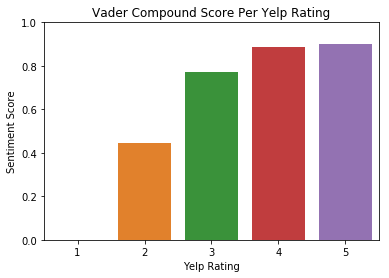

In [161]:
fig = plt.figure()
sns.barplot(x, y);
plt.ylim(0,1);
plt.xlabel('Yelp Rating');
plt.ylabel('Sentiment Score');
plt.title('Vader Compound Score Per Yelp Rating');